# ロジスティック回帰

$$
p = \frac{1}{1 + exp(-\sum_{i=0}^{m}w_ix_i)}
$$

# 特徴
- 最尤推定法を使う （詳しくは https://ja.wikipedia.org/wiki/交差エントロピー
- 二値の発生確率を予測
- 質的変数でも扱える
- 発生確率なので0~1に収まる
- 閾値を決めて（通常0.5）分類する

# 数式の意味
オッズは　$\frac{p}{1-p}$と表すことができる.  
対数を取ることで尺度を合わせることができ, 重みを$w_i$とすると  


$\log(\frac{p}{1-p}) = w_0x_0+w_1x_1+\cdots+w_mx_m = \sum_{i=0}^{m}w_ix_i$と表すことができる. （$w_0$は切片）

シグモイド関数
$\sigma(x) = \frac{1}{1+exp(-x)}$のxを置き換えている. （よって0~1に収まる）

# 実際にやってみた

参考：https://qiita.com/0NE_shoT_/items/b702ab482466df6e5569

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [13]:
!pip install seaborn

In [14]:
import seaborn as sns
iris_df = sns.load_dataset('iris') # データセットの読み込み
iris_df = iris_df[(iris_df['species']=='versicolor') | (iris_df['species']=='virginica')] # 簡単のため、2品種に絞る

In [15]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


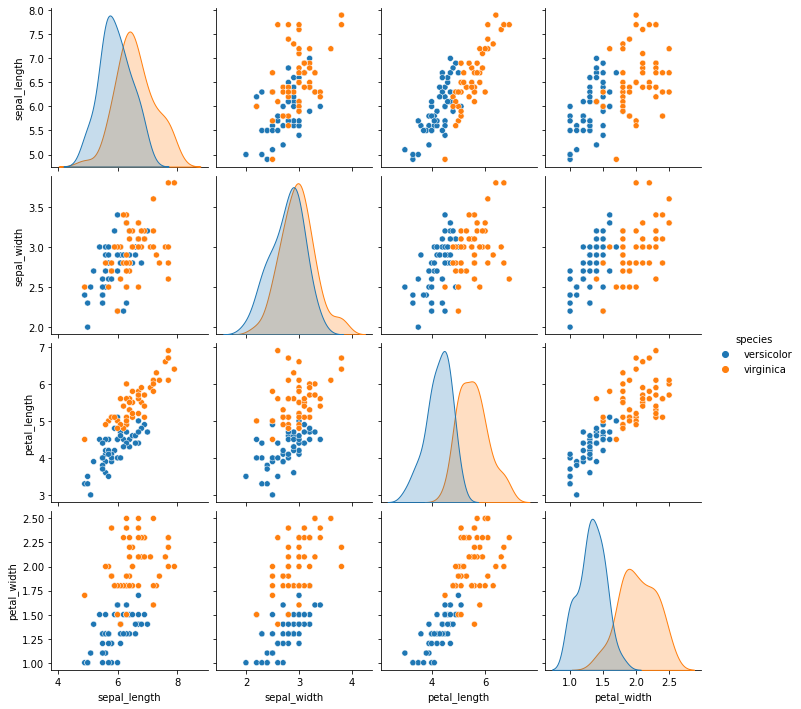

In [19]:
# 散布図行列
import matplotlib.pyplot as plt
sns.pairplot(iris_df, hue='species')
plt.show()

- hueは色分け
- なぜかカーネル密度推定になっているが本来はヒストグラムが表示される
- 3行3列のグラフをみると2種の分類がみた感じできそう

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = iris_df[['petal_length']] # 説明変数, グラフからこれを使うとうまく分類できそうに見えた
Y = iris_df['species'].map({'versicolor': 0, 'virginica': 1}) # versicolorをクラス0, virginicaをクラス1とする
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, Y_train) # ロジスティック回帰モデルの重みを学習

LogisticRegression()

In [23]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[3.43226939]]
intercept =  [-16.54483764]


In [25]:
# 分類できた
Y_pred = lr.predict(X_test)
print(Y_pred)

[0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 0]


In [29]:
#性能評価
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#混同行列
print('confusion matrix = \n', confusion_matrix(y_true=Y_test, y_pred=Y_pred))

#正解率
print('accuracy = ', accuracy_score(y_true=Y_test, y_pred=Y_pred))

#適合率
print('precision = ', precision_score(y_true=Y_test, y_pred=Y_pred))

#再現率
print('recall = ', recall_score(y_true=Y_test, y_pred=Y_pred))

#F1スコア
print('f1 score = ', f1_score(y_true=Y_test, y_pred=Y_pred))

confusion matrix = 
 [[ 7  3]
 [ 0 10]]
accuracy =  0.85
precision =  0.7692307692307693
recall =  1.0
f1 score =  0.8695652173913044


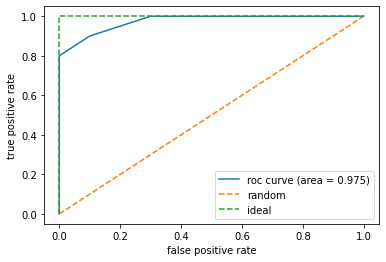

In [31]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(X_test)[:, 1] # 検証データがクラス1に属する確率
fpr, tpr, thresholds = roc_curve(y_true=Y_test, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score
print('auc = ', roc_auc_score(y_true=Y_test, y_score=Y_score))

auc =  0.975


In [ ]:
- AUCはROC曲線の下側の面積（最大値1）
- 横軸：偽陽性率, 縦軸：真陽性率
- モデルの分類性能